In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('dataset/height_weight.csv')
df

,Height_cm,Weight_kg
0,150,50
1,155,53
2,160,57
3,165,61
4,170,66
5,172,68
6,175,72
7,178,75
8,180,78
9,185,83


Text(0, 0.5, 'Height')

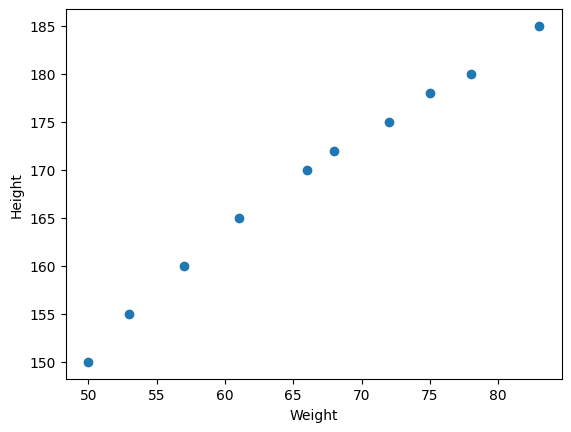

In [48]:
plt.scatter(df['Weight_kg'], df['Height_cm'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [49]:
df.corr()

,Height_cm,Weight_kg
Height_cm,1.000000,0.994251
Weight_kg,0.994251,1.000000


In [50]:
# indep features shd be DF of 2d Arrays since we may have multiple features
x = df[['Weight_kg']]
np.array(x).shape

# dep feature y can be a 1d array since there is only 1 output feature in linear regr
y = df['Height_cm']
y

0    150
1    155
2    160
3    165
4    170
5    172
6    175
7    178
8    180
9    185
Name: Height_cm, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)


In [52]:
# perform Standardization (z-score) to bring values in same range (mean - 0 std - 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [53]:
x_train = scaler.fit_transform(x_train)
# we don't use fit_transform but just transform to prevent data leakage ie
# model shouldn't know anything abt the testing data
x_test = scaler.transform(x_test)


In [54]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()


In [55]:
print("x_train mean:", x_train.mean())
print("x_test mean:", x_test.mean())


x_train mean: -5.868321701590113e-16
x_test mean: 0.004547898287864551


In [56]:
regr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [57]:
print("Coefficient/Slope of linear regr line: ", regr.coef_)
print("Intercept of linear regr line: ", regr.intercept_)

Coefficient/Slope of linear regr line:  [10.83309372]
Intercept of linear regr line:  169.0


In [58]:
regr.predict(x_train)

array([152.15040953, 178.01600894, 159.39277736, 186.29300074,
       168.70439315, 163.53127327, 174.91213701])

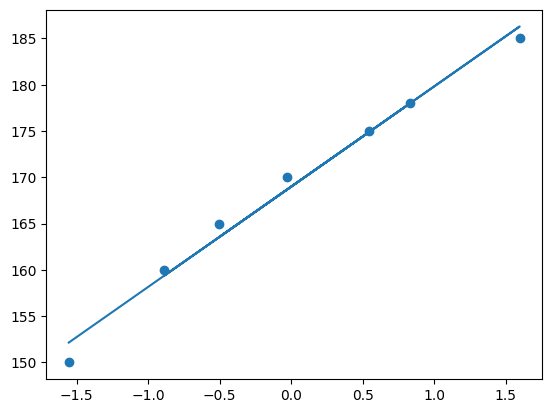

In [59]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regr.predict(x_train))

In [60]:
# prediciting using model on x_test testing dataset
y_pred = regr.predict(x_test)


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# using metrics to compare y_pred and y_test values to check model perf

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)

MSE:  0.9409161187496334
MAE:  0.8668404070488881
RMSE:  0.9700083085982477


In [62]:
from sklearn.metrics import r2_score
r_Score = r2_score(y_test, y_pred)
print("R2 score: ", r_Score)


R2 score:  0.991341262710893


In [66]:
# Adjusted R2 Score 
1 - (1 - r_Score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

0.9826825254217859

In [70]:
# For new input data to predict the height given a weight
# important to standardize the value before using model to perform predicitions
pred = regr.predict(scaler.transform([[72]]))
print(pred)

[174.91213701]


/Users/mitaligupta/Desktop/COURSEUDEMY/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
